<a href="https://colab.research.google.com/github/kiwibird35/geogfiles/blob/main/Homework2_Alltogether.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1**

In [ ]:
!git clone https://github.com/gisalgs/geom.git

Cloning into 'geom'...
remote: Enumerating objects: 314, done.
remote: Total 314 (delta 0), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (314/314), 57.03 KiB | 209.00 KiB/s, done.
Resolving deltas: 100% (177/177), done.


In [ ]:
!git clone https://github.com/gisalgs/data.git

Cloning into 'data'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 179 (delta 2), reused 10 (delta 1), pack-reused 168
Receiving objects: 100% (179/179), 24.91 MiB | 13.97 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from geom.point import *
from geom.centroid import *
from geom.point_in_polygon import *
def in_or_out(pip_result):
    if pip_result:
        return 1
    return 0

In [ ]:
from geom.shapex import*

In [ ]:
from data import*

In [ ]:
is_polygon_shp = False
while not is_polygon_shp:
  #fname = input("Enter a shapefile name: ")
  fname = 'data/uscnty48area.shp'
  try:
    mapdata = shapex(fname)
  except Exception as e:
    print('Error:', e)
    print('Make sure your enter a valid shapefile')
    continue
  shp_type = mapdata[0]['geometry']['type']
  if shp_type in ['Polygon', 'MultiPolygon']:
    is_polygon_shp = True
    print('There are', len(mapdata), 'features in the shapfile')
  else:
    print('Make sure it is a polygon or multipolygon shapefile')


There are 3109 features in the shapfile


In [ ]:
import random
g = random.randint(0,3109)
f = mapdata[g]

In [ ]:
raw_points = []
geom = f['geometry']['coordinates']
for p in geom[0]:
  raw_points.append([p[0], p[1]])

points = [Point(p[0], p[1]) for p in raw_points]

x_list = []
y_list = []

for x in range(len(raw_points)):
    x_list.append(raw_points[x][0])
    y_list.append(raw_points[x][1])

bound_box = [[min(x_list), min(y_list)], [min(x_list), max(y_list)], [max(x_list), max(y_list)], [max(x_list), min(y_list)], [min(x_list), min(y_list)] ]

box_pts = [Point(p[0], p[1]) for p in bound_box]

minx = min(x_list)
maxx = max(x_list)
miny = min(y_list)
maxy = max(y_list)


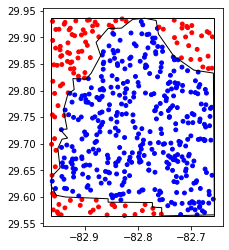

In [ ]:
import random
points3 = [Point(random.uniform(minx, maxx), random.uniform(miny, maxy)) for i in range(500)]

ax = plt.gca()
line1 = [ [p.x, p.y] for p in points ]
l1 = plt.Polygon(line1, closed=True, fill=False, edgecolor='black')
ax.add_patch(l1)

bound_box = [ [min(x_list), min(y_list)], [min(x_list), max(y_list)], [max(x_list), max(y_list)], [max(x_list), min(y_list)], [min(x_list), min(y_list)]  ]
box = [Point(p[0], p[1]) for p in bound_box]
line2 = [ [p.x, p.y] for p in box ]
l2 = plt.Polygon(line2, closed=True, fill=False, edgecolor='black')
ax.add_patch(l2)

pts = points3

results = [in_or_out(pip_cross(p, points)[0]) for p in pts]

colors = [['red', 'blue'][i] for i in results]

l3 = plt.scatter([p.x for p in pts], [p.y for p in pts], color=colors, s=15)

ax.set_aspect(1)
plt.show()

The area is 0.08360466458293558


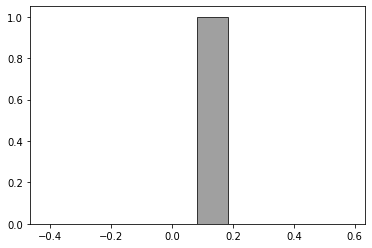

In [ ]:
for i in range(100):
  points3 = [Point(random.uniform(minx, maxx), random.uniform(miny, maxy)) for i in range(500)]


result = centroid(points)
print('The area is %s'%(result[0]))



ax = plt.gca()
ax.hist(result[0], 10, facecolor='grey', edgecolor='black', alpha=0.75)
plt.show()

# **Question 2**

The value of numgraticule in the projections tutorial is 56 because 56 is the number of longitude and latitude lines that make up the grid lines of the projected graticule on the map. There are 56 lines total between long/lat.

# **Question 3**

When you change lon0 to 60, you are shifting the projection over from 0 degrees to 60 degrees for the central meridian. A symmetrical map can be made by switching the 60 back to 0, so you start the central meridian at 0 degree.

# **Question 4**
**y = 0.5072*y/2.0**- makes sure that the length of the central meridian is 0.5072 times the length of the equator

**dx = x/360.0** - makes sure that the meridians are equally spaced on each parallel line

**x = dx*lon** - makes sure that the meridians are equally spaced on each parallel line

Doing this can make sure that original data coordinates can be transformed into the Robinson coordinates for proper projection.


# **Question 5**

In the first polygon shown on the Point-in-polygon tutorial, the return for the pip_cross function for the half-line a will be that it will be out of the polygon because the line crosses/intersects the polygon an even amount of times, 10. Half lines b, c, & d will be in because the lines cross/intersects the polygon an odd amount of times.

# **Question 6**

https://en.wikipedia.org/wiki/Lambert_cylindrical_equal-area_projection

In [ ]:
import urllib.request as request
import json
url = 'https://raw.githubusercontent.com/gisalgs/data/master/ne_110m_coastline.geojson'
with request.urlopen(url) as response:
    coastline_obj = json.loads(response.read())

In [ ]:
raw_points=[]
linenum = 0
lat0, lat1 = -90, 91
lon0, lon1 = -180, 181

for lat in range(lat0, lat1, 10):
    for lon in range(lon0, lon1, 10):
      raw_points.append([linenum, lon, lat])
    linenum += 1

for lon in range(lon0, lon1, 10):
    for lat in range(lat0, lat1, 10):
      raw_points.append([linenum, lon, lat])
    linenum += 1

numgraticule = linenum

In [ ]:
for f in coastline_obj['features']:
    geom = f['geometry']['coordinates']
    for p in geom[0]:
      raw_points.append([linenum, p[0], p[1]])
    linenum += 1

numline = linenum

In [ ]:
!rm geom -rf
!git clone https://github.com/gisalgs/geom.git
from geom.worldmap import *
from geom.plot_worldmap import *

Cloning into 'geom'...
remote: Enumerating objects: 314, done.
remote: Total 314 (delta 0), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (314/314), 57.03 KiB | 778.00 KiB/s, done.
Resolving deltas: 100% (177/177), done.


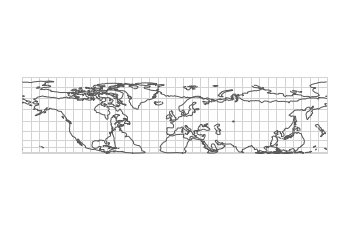

In [ ]:
from math import sin, radians, cos, pi

points=[]

def transform_lambert(lon, lat, lon0=0):
  x = lon-lon0
  y = lat * sin(radians(lat))
  return x, y

for p in raw_points:
    p1 = transform_lambert(p[1], p[2])
    points.append([p[0], p1[0], p1[1]])

_, ax = plt.subplots()
plot_world(ax, points, numgraticule, numline)
plt.show()

# **Question 7**

In [ ]:
is_polygon_shp = False
while not is_polygon_shp:
  #fname = input("Enter a shapefile name: ")
  fname = 'data/uscnty48area.shp'
  try:
    mapdata = shapex(fname)
  except Exception as e:
    print('Error:', e)
    print('Invalid')
    continue
  shp_type = mapdata[0]['geometry']['type']
  if shp_type in ['Polygon', 'MultiPolygon']:
      is_polygon_shp = True
      print('There are', len(mapdata), 'features in the shapfile')
  else:
    print('Invalid shapefile type, reenter the correct shapefile name.')
  print()



There are 3109 features in the shapfile



In [ ]:
import random
g = random.randint(0,3109)
f = mapdata[g]
print(f)

raw_points = []
geom = f['geometry']['coordinates']
for p in geom[0]:
  raw_points.append([p[0], p[1]])
print(raw_points)

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[(-85.53619816466721, 37.10952534167927), (-85.63259016475695, 37.12171934169055), (-85.6639551647861, 37.14086434170849), (-85.69142916481178, 37.17984634174468), (-85.68169316480271, 37.26846734182732), (-85.70526716482459, 37.294162341851234), (-85.70556416482486, 37.3222993418774), (-85.69406516481422, 37.365948341918056), (-85.66199816478434, 37.39215934194249), (-85.66939816479135, 37.41734934196597), (-85.66892416479072, 37.43775034198484), (-85.65323116477612, 37.44950034199587), (-85.64703516477039, 37.46836034201351), (-85.59044916471771, 37.462924342008364), (-85.5943481647214, 37.44399234199068), (-85.58536116471305, 37.42737134197523), (-85.47418616460936, 37.34887334190216), (-85.39808116453855, 37.23696934179793), (-85.41478916455412, 37.21711434177951), (-85.37635916451836, 37.211274341774015), (-85.3612531645042, 37.19169834175568), (-85.36468616450748, 37.18183534174659), (-85.40060616454093, 37.15945

In [ ]:
def test_polygon_type(poly):
  points = [Point(p[0], p[1]) for p in raw_points]
  result = centroid(points)
  geom_type = poly['geometry']['type']
  if geom_type == 'Multipolygon':
    for geom in poly['geometry']['coordinates']:
        if len(geom) > 1:
          return 'Complicated polygons: no centroid computed'
    return 'Complicated polygons: no centroid computed. The area is %s'%(result[0])
  elif geom_type == 'Polygon':
    if len(poly['geometry']['coordinates']) > 1:
        return 'Complicated polygons: no centroid computed'
    return 'The area is %s and centroid is at %s'%(result[0], result[1])

test_polygon_type(f)

'The area is 0.07532897090754886 and centroid is at (-85.6, 37.3)'

# **Question 8**

In [ ]:
def find_perimeter(polygon):
  if polygon[0] != polygon[-1]:
    raise Exception('Polygon not closed')
  perim = 0
  for i in range(len(polygon_p)-1):
    perim += Point.distance(polygon_p[i], polygon_p[i+1])
    return perim

points_perim = [ [0,10], [5,0], [10,10], [15,0], [20,10], [25,0], [30,20],[40,20], [45,0], [50,50], [40,40], [30,50], [25,20], [20,50], [15,10], [10,50], [8, 8], [4,50], [0, 10] ]

polygon_p = [Point(p[0], p[1]) for p in points_perim]

find_perimeter(polygon_p)


11.180339887498949

# **Question 9**

In [ ]:
my_polygon = {
    "type": "Feature",
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [
                [5, 0], [3, 1], [3, 4], [5, 5], [6, 7], [9, 8], [10, 6], [12, 6], [12, 3], [9, 2], [9, 1], [5, 0]
            ]
        ]
    },
    "properties": {
        "name": "Kims Polygon"
    }
}
kim_points = []

geom = my_polygon['geometry']['coordinates']
for p in geom[0]:
  kim_points.append([p[0], p[1]])

kims_polygon = [Point(p[0], p[1]) for p in kim_points]

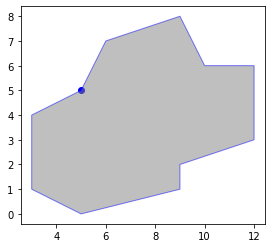

In [ ]:
_, ax = plt.subplots(1, 1)
ax = plt.gca()
line1 = [ [p.x, p.y] for p in kims_polygon ]
l1 = plt.Polygon(line1, closed=True, fill=True, facecolor='grey', edgecolor='blue', alpha=0.5)
ax.add_patch(l1)

ax.scatter([p.x for p in kims_polygon], [p.y for p in kims_polygon], color='grey', marker='o', alpha=0.)
p1 = Point(5, 5)
pts = [p1]
results = [in_or_out(pip_cross(p, kims_polygon)[0]) for p in pts]

colors = [['red', 'blue'][i] for i in results]

l2 = plt.scatter([p.x for p in pts], [p.y for p in pts], color=colors)

ax.set_aspect(1)
plt.show()

In [ ]:
size_points = [Point(random.randint(3,12), random.randint(0,8)) for i in range(100)]


pip_cross(size_points[0], kims_polygon)
count = sum([in_or_out(pip_cross(p, kims_polygon)[0]) for p in size_points])

area = (9*8)*(count/100)
print('The size of Kims Polygon is', area)


for p in [p1]:
    print(f'Point {p} is {"IN" if pip_cross(p, kims_polygon)[0] is True else "OUT"}')

The size of Kims Polygon is 41.04
Point (5, 5) is IN


In [ ]:
find_perimeter(kims_polygon)

11.180339887498949

# **Question 10**

In [ ]:
filename = 'data/uscnty48area.shp'
mapdata_county = shapex(filename)

import random

frank = mapdata_county[2382]

print(frank)
frank['properties']

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[(-83.2428191625313, 39.80447834418919), (-83.25084616253889, 39.91220434428942), (-83.23213816252132, 39.926236344302424), (-83.26342716255044, 40.00156534437269), (-83.25198316253977, 40.023892344393516), (-83.26110816254845, 40.047551344415524), (-83.21291916250357, 40.04702134441504), (-83.2056861624967, 40.10730834447122), (-83.1719331624654, 40.107018344470816), (-83.17017016246359, 40.13798634449972), (-82.75639616207832, 40.12323934448591), (-82.76614516208747, 39.96934334434263), (-82.78039816210071, 39.96693234434042), (-82.7820531621021, 39.93235334430824), (-82.8079031621262, 39.93262334430847), (-82.81045116212863, 39.91026534428761), (-82.79426116211357, 39.91049434428783), (-82.8036291621222, 39.817922344201634), (-82.82339816214062, 39.817541344201345), (-82.82666416214374, 39.78879434417445), (-83.2428191625313, 39.80447834418919)]]}, 'properties': {'NAME': 'Franklin', 'STATE_NAME': 'Ohio', 'FIPS': '39

{'Area': 1407660405.76,
 'AreaKM2': 1407.66040576,
 'FIPS': '39049',
 'GEO_ID': '05000US39049',
 'NAME': 'Franklin',
 'PopDensity': 759,
 'STATE_NAME': 'Ohio',
 'UrbanPop': 98.13139279}

In [ ]:
from geom.transforms import transform_sinusoidal

In [ ]:
franklin_points = []
geom_frank = f['geometry']['coordinates']
for p in geom_frank[0]:
  franklin_points.append([p[0], p[1]])

In [ ]:
fcounty_points=[]

def transform_sinusoidal(lon, lat, lon0=0):
  lon1 = lon-lon0
  x = lon1 * cos(radians(lat))
  y = lat
  return x, y

for p in franklin_points:
  p1 = transform_sinusoidal(p[1], p[2])
  fcounty_points.append([p[0], p1[0], p1[1]])

_, ax = plt.subplots(1, 1)
plot_world(ax, fcounty_points, numgraticule, numline)
plt.show()

IndexError: ignored

In [ ]:
franklin_size = [ Point(p[0], p[1]) for p in franklin_points ]
results = centroid(franklin_size)
print('The area of Franklin County is %s'%(results[0]))

The area of Franklin County is 0.07532897090754886
